# Machine Project 1

## Schrodingirls

### Members:
Lee, Nicholas Philson \
Mata, Maria Sarah Althea\
Ranada, Arianne\
Uy, Jasmine Louise\
Valenzuela, Shanley

In [24]:
# Dependency checks

!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Problem 1

Generate a GIF for one of the following state evolutions. Proof to be provided is the solved quantum state per state evolution (applying a gate to a previous state) and its respective quantum circuit:

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_vector

In [ ]:
# Convert Statevector → (x,y,z)
def to_bloch_coords(vec):
    vec = np.asarray(vec)   
    alpha, beta = vec
    x = 2 * np.real(np.conj(alpha)*beta)
    y = 2 * np.imag(np.conj(alpha)*beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2
    return [x, y, z]

In [ ]:
# Build circuit
sim = AerSimulator(method="statevector")

# Step 0: |0>
qc0 = QuantumCircuit(1)
qc0.save_statevector()

# Step 1: H|0>
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.save_statevector()

# Step 2: ZH|0>
qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.z(0)
qc2.save_statevector()

# Step 3: HZH|0> = |1>
qc3 = QuantumCircuit(1)
qc3.h(0)
qc3.z(0)
qc3.h(0)
qc3.save_statevector()

circuits = [qc0, qc1, qc2, qc3]
labels = ["|0⟩", "|+⟩", "|−⟩", "|1⟩"]

In [30]:
# Simulate states
bloch_vectors = []

for c in circuits:
    compiled = transpile(c, sim)
    result = sim.run(compiled).result()
    statevec = result.get_statevector()
    bloch_vectors.append(to_bloch_coords(statevec))

GIF saved as state_evolution.gif


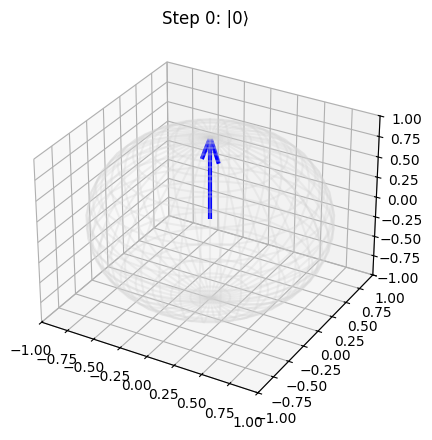

In [ ]:
# Create GIF animation
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.clear()
    ax.set_title(f"Step {frame}: {labels[frame]}")
    xv, yv, zv = bloch_vectors[frame]

    # Draw a Bloch sphere
    u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
    ax.plot_wireframe(np.cos(u)*np.sin(v),
                      np.sin(u)*np.sin(v),
                      np.cos(v),
                      color="lightgray", alpha=0.3)

    # Draw Bloch vector
    ax.quiver(0, 0, 0, xv, yv, zv, color="red", linewidth=3)

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])

    return ax

anim = FuncAnimation(fig, update, frames=len(bloch_vectors), interval=1500)

# SAVE GIF
anim.save("state_evolution.gif", writer=PillowWriter(fps=1))
print("GIF saved as state_evolution.gif")

![GIF](state_evolution.gif)

## Problem 2

### 3-gate XNOR

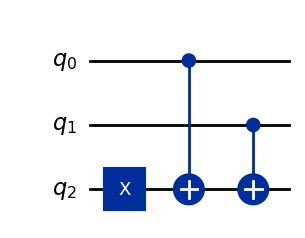

In [10]:
qc = QuantumCircuit(3)

qc.x(2)
qc.cx(0,2)
qc.cx(1,2)

qc.draw('mpl')

Simulation:

In [19]:
## Let's validate the XNOR Truth table:

simulator = AerSimulator()

print("XNOR Truth Table Validation:")
print("Input Q0 Q1 | Output Q0 Q1 Q2")
print("------------------------------------")

for q_zero in [0, 1]:
    for q_one in [0, 1]:
        qc = QuantumCircuit(3,3)

        # Initialize state
        if q_zero == 1:
            qc.x(0)
        if q_one == 1:
            qc.x(1)

        # Apply additional gates
        qc.x(2)
        qc.cx(0,2)
        qc.cx(1,2)

        # Add measurements
        qc.measure([0, 1, 2], [0, 1, 2])

        # Compile and run
        compiled_circuit = transpile(qc, simulator)
        job = simulator.run(compiled_circuit, shots=10000)
        result = job.result()
        counts = result.get_counts()
        # Get the result (should be deterministic)
        output = list(counts.keys())[0]

        # Output is in little-endian order (Q1Q0), so reverse for Q0 Q1
        print(f"    {q_zero}   {q_one}   |    {output[2]}   {output[1]}  ->  {output[0]}")


XNOR Truth Table Validation:
Input Q0 Q1 | Output Q0 Q1 Q2
------------------------------------
    0   0   |    0   0  ->  1
    0   1   |    0   1  ->  0
    1   0   |    1   0  ->  0
    1   1   |    1   1  ->  1


### 3-gate NAND


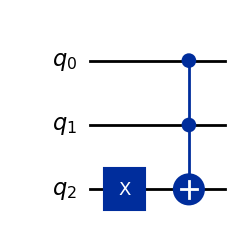

In [17]:
qc = QuantumCircuit(3)

qc.x(2)
qc.ccx(0,1,2)

qc.draw('mpl')


Simulation:

In [22]:
print("NAND Truth Table Validation:")
print("Input Q0 Q1 | Output Q0 Q1 Q2")
print("------------------------------------")

for q_zero in [0, 1]:
    for q_one in [0, 1]:
        qc = QuantumCircuit(3,3)

        # Initialize state
        if q_zero == 1:
            qc.x(0)
        if q_one == 1:
            qc.x(1)

        # Apply additional gates
        qc.x(2)
        qc.ccx(0,1,2)

        # Add measurements
        qc.measure([0, 1, 2], [0, 1, 2])

        # Compile and run
        compiled_circuit = transpile(qc, simulator)
        job = simulator.run(compiled_circuit, shots=10000)
        result = job.result()
        counts = result.get_counts()
        # Get the result (should be deterministic)
        output = list(counts.keys())[0]

        # Output is in little-endian order (Q1Q0), so reverse for Q0 Q1
        print(f"    {q_zero}   {q_one}   |    {output[2]}   {output[1]}  ->  {output[0]}")




NAND Truth Table Validation:
Input Q0 Q1 | Output Q0 Q1 Q2
------------------------------------
    0   0   |    0   0  ->  1
    0   1   |    0   1  ->  1
    1   0   |    1   0  ->  1
    1   1   |    1   1  ->  0


### 3-gate OR


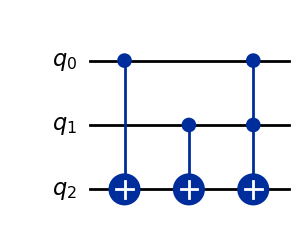

In [21]:
qc = QuantumCircuit(3)

qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,2)

qc.draw('mpl')


Simulation:

In [23]:
print("OR Truth Table Validation:")
print("Input Q0 Q1 | Output Q0 Q1 Q2")
print("------------------------------------")

for q_zero in [0, 1]:
    for q_one in [0, 1]:
        qc = QuantumCircuit(3,3)

        # Initialize state
        if q_zero == 1:
            qc.x(0)
        if q_one == 1:
            qc.x(1)

        # Apply additional gates
        qc.cx(0,2)
        qc.cx(1,2)
        qc.ccx(0,1,2)

        # Add measurements
        qc.measure([0, 1, 2], [0, 1, 2])

        # Compile and run
        compiled_circuit = transpile(qc, simulator)
        job = simulator.run(compiled_circuit, shots=10000)
        result = job.result()
        counts = result.get_counts()
        # Get the result (should be deterministic)
        output = list(counts.keys())[0]

        # Output is in little-endian order (Q1Q0), so reverse for Q0 Q1
        print(f"    {q_zero}   {q_one}   |    {output[2]}   {output[1]}  ->  {output[0]}")


OR Truth Table Validation:
Input Q0 Q1 | Output Q0 Q1 Q2
------------------------------------
    0   0   |    0   0  ->  0
    0   1   |    0   1  ->  1
    1   0   |    1   0  ->  1
    1   1   |    1   1  ->  1


### 3-gate NOR


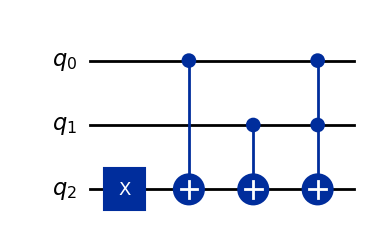

In [24]:
qc = QuantumCircuit(3)

qc.x(2)
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,2)

qc.draw('mpl')


Simulation:

In [25]:
print("NOR Truth Table Validation:")
print("Input Q0 Q1 | Output Q0 Q1 Q2")
print("------------------------------------")

for q_zero in [0, 1]:
    for q_one in [0, 1]:
        qc = QuantumCircuit(3,3)

        # Initialize state
        if q_zero == 1:
            qc.x(0)
        if q_one == 1:
            qc.x(1)

        # Apply additional gates
        qc.x(2)
        qc.cx(0,2)
        qc.cx(1,2)
        qc.ccx(0,1,2)

        # Add measurements
        qc.measure([0, 1, 2], [0, 1, 2])

        # Compile and run
        compiled_circuit = transpile(qc, simulator)
        job = simulator.run(compiled_circuit, shots=10000)
        result = job.result()
        counts = result.get_counts()
        # Get the result (should be deterministic)
        output = list(counts.keys())[0]

        # Output is in little-endian order (Q1Q0), so reverse for Q0 Q1
        print(f"    {q_zero}   {q_one}   |    {output[2]}   {output[1]}  ->  {output[0]}")
        

NOR Truth Table Validation:
Input Q0 Q1 | Output Q0 Q1 Q2
------------------------------------
    0   0   |    0   0  ->  1
    0   1   |    0   1  ->  0
    1   0   |    1   0  ->  0
    1   1   |    1   1  ->  0
